<a href="https://www.kaggle.com/code/hoangnhu/sydney-housing-price-2000-2019?scriptVersionId=100300434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORTING LIBRARIES](#2)
    
* [3. DATA PREPARATION](#3)
    
* [4. DATA CLEANING](#4)   
    
* [5. ANALYSIS](#5) 
      
* [6. VISUALIZATION](#6)
    
* [7. CONCLUSION](#7)
    


<a id="1"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">1. INTRODUCTION</p>
## **1.1 About dataset**
There are two data sets being used for this project
### - Sydney housing price
200,000 Sydney property sales from 2000-2019 scarped from realestate.com.au
#### *Features*
    ** Date: selling date
    ** Id: transaction id
    ** suburb: suburb of property
    ** postalCode: postal code
    ** sellPrice: selling price
    ** bed: number of bedrooms
    ** bath: number of bathrooms
    ** car: number of car spaces
    ** propType: property type
### - Sydney suburb coordinates
#### *Features*
    ** Suburb: suburb name
    ** Latitude
    ** Longitude

## **1.2 Project**
Objective: inspecting the past 10 years of housing trend in Sydney, in term of transaction volume, selling price, house's features, and location. Based on the analysis result, making suggestion to the buyers the best time of the the year to buy, and the best location that suit their budget to afford a dream home.

<a id="2"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">2. IMPORTING LIBRARIES</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# data visualization
import missingno as msno # visualize missing values
import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots

# Dealing with warning message
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sydney-house-prices/SydneyHousePrices.csv
/kaggle/input/suburbs-in-sydney-australia/sydney_suburbs.csv


### STYLING

In [2]:
# Set styling
plt.rcParams['figure.figsize'] = (10,8) # setting the graph size globally

# Color for consistent visual
light_color = '#496595'
deep_color = '#c6ccd8'

pd.options.display.float_format = '{:,.0f}'.format # float number format

<a id="3"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">3. DATA PREPARATION</p>
This section includes **loading data**, **exploring features**

## 3.1 Loading Data

In [3]:
housing_price = pd.read_csv("../input/sydney-house-prices/SydneyHousePrices.csv")
suburb = pd.read_csv("../input/suburbs-in-sydney-australia/sydney_suburbs.csv")
    
data = housing_price.copy()
print("Loading Sydney housing price data set")
data.head()

Loading Sydney housing price data set


,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4,2,2,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4,3,4,house
2,2019-06-07,3,Whale Beach,2107,2920000,3,3,2,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3,1,2,house
4,2019-05-22,5,Whale Beach,2107,8000000,5,4,4,house


In [4]:
print("Loading Sydney suburb data set")
suburb.info()

Loading Sydney suburb data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Suburb     680 non-null    object 
 1   Latitude   678 non-null    float64
 2   Longitude  678 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.1+ KB


## 3.2 Exploring Features

In [5]:
data.info()
print("\nNumber of data points: {0:,d}\nNumber of features: {1:10,d}".format(data.shape[0],data.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB

Number of data points: 199,504
Number of features:          9


In [6]:
# show statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,"199,504","99,752","57,592",1,"49,877","99,752","149,628","199,504"
postalCode,"199,504","2,196",193,"2,000","2,082","2,144","2,211","4,878"
sellPrice,"199,504","1,269,776","6,948,239",1,"720,000","985,000","1,475,000","2,147,483,647"
bed,"199,350",4,1,1,3,3,4,99
bath,"199,504",2,1,1,1,2,2,99
car,"181,353",2,1,1,1,2,2,41


In [7]:
print("Counting missing data for each feature")
data.isnull().sum()

Counting missing data for each feature


Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

Visualizing missing data


<AxesSubplot:>

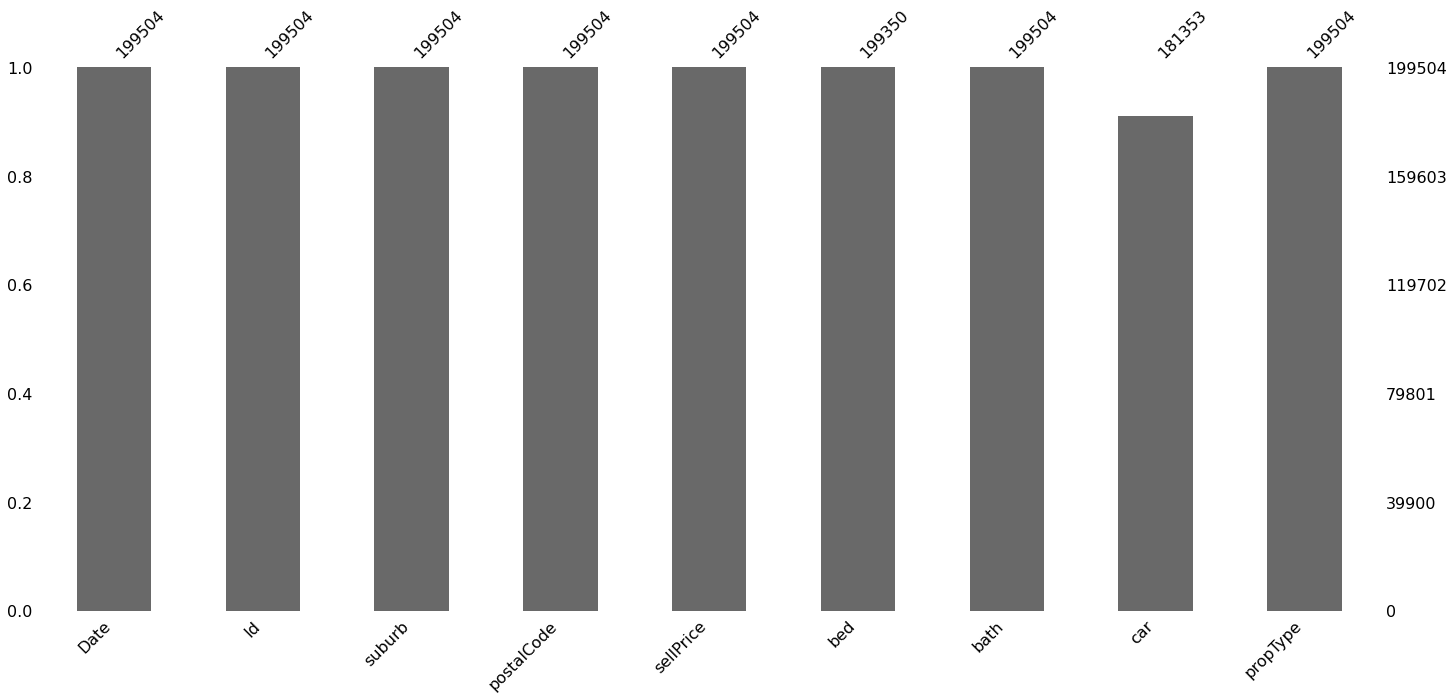

In [8]:
# Visualizing missing values
print("Visualizing missing data")
msno.bar(data)

In [9]:
# Counting unique values for each feature of the data set
count = pd.DataFrame()
for i in data.columns:
    l = len(data[i].value_counts())
    new_row = {'feature':i , 'total_unique_values':l}
    count = count.append(new_row, ignore_index=True)
count

,feature,total_unique_values
0,Date,"4,683"
1,Id,"199,504"
2,suburb,685
3,postalCode,235
4,sellPrice,"8,439"
5,bed,30
6,bath,24
7,car,26
8,propType,8


In [10]:
print('Counting records for each unique value per feature')
for i in data.columns:
    print(data[i].value_counts().to_frame())

Counting records for each unique value per feature
            Date
2015-03-28   305
2017-04-08   281
2017-02-25   263
2015-05-30   244
2017-03-25   237
...          ...
2007-09-24     1
2007-04-22     1
2007-11-29     1
2008-11-02     1
2004-09-10     1

[4683 rows x 1 columns]
        Id
1        1
133020   1
132998   1
132999   1
133000   1
...     ..
66504    1
66505    1
66506    1
66507    1
199504   1

[199504 rows x 1 columns]
                     suburb
Castle Hill            1250
Strathfield            1248
Ermington              1248
Carlingford            1247
Auburn                 1244
...                     ...
Sydney Olympic Park       1
Clyde                     1
Nattai                    1
Rose Bay North            1
Haymarket                 1

[685 rows x 1 columns]
      postalCode
2010        1251
2155        1250
2229        1250
2026        1250
2226        1250
...          ...
3029           1
3350           1
2261           1
3057           1
4570          

### *Findings
* 199,504 data points (records), 9 features
* Incorrect datatypes existing [Date] [bed] [car]
* Missing values existing [bed] [car]
* Inconsistent feature name
* Outliers: [sellPrice] [bed] [bath] [car]
* Other things to consider when doing analysis:
    - house is the most sold property type
    - number of car spaces almost range between (1,10), most common is 1 or 2

<a id="4"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">4. DATA CLEANING</p>
This section involves:
* Removing property type other than "house" (for this analysis purpose)
* Dropping column [propType] as not needed anymore.
* Renaming column for consistency
* Removing transactions other than Sydney (postal code should start by 2 and have 4 digits)
* Correcting data types: [Date] (object->date), [bed] & [car] (float->int)
* Handling Null values  [bed] [car]: replacing missing values by 0 (zero)
* Handling Outliers: [bed] [bath] [car] [sellPrice]
* Creating new features (columns) for analysis purpose [year] [month] of sales


In [11]:
# create new dataframe cdf to store cleaned data
# Remove propType other than "house", drop column [propType]
cdf = data.drop(index=(data[data.propType!='house'].index), columns='propType')

# Remove postalCode >=3000 (keep Sydney only)
cdf.drop(cdf[cdf.postalCode >=3000].index, inplace=True)

# Rename column for consistency
cdf.rename(columns={'Date':'date', 'Id':'id'}, inplace=True)

# Correct data types
cdf['date'] = pd.to_datetime(cdf['date'])

# Handling Null values: replace null values with 0 ([bed], [car])
cdf = cdf.fillna(0)
# convert to best possible data types 
cdf = cdf.convert_dtypes()

cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170105 entries, 0 to 199503
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        170105 non-null  datetime64[ns]
 1   id          170105 non-null  Int64         
 2   suburb      170105 non-null  string        
 3   postalCode  170105 non-null  Int64         
 4   sellPrice   170105 non-null  Int64         
 5   bed         170105 non-null  Int64         
 6   bath        170105 non-null  Int64         
 7   car         170105 non-null  Int64         
dtypes: Int64(6), datetime64[ns](1), string(1)
memory usage: 12.7 MB


In [12]:
# recheck if missing value exists
cdf.isnull().sum()

date          0
id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
dtype: int64

### Results  after cleaning
- 170,105 data points left after cleaning
- All data types corrected (1 datetime, 1 string, 8 interger)
- Missing values are replaced by 0

### Handling Outliers
* [bed] [bath] [car]: using histogram to see distribution then to decide dropping records

* [sellPrice]: using InterQuartile Range technique to remve outliers

* #### Check outliers for number of bedrooms, bathrooms and car spaces

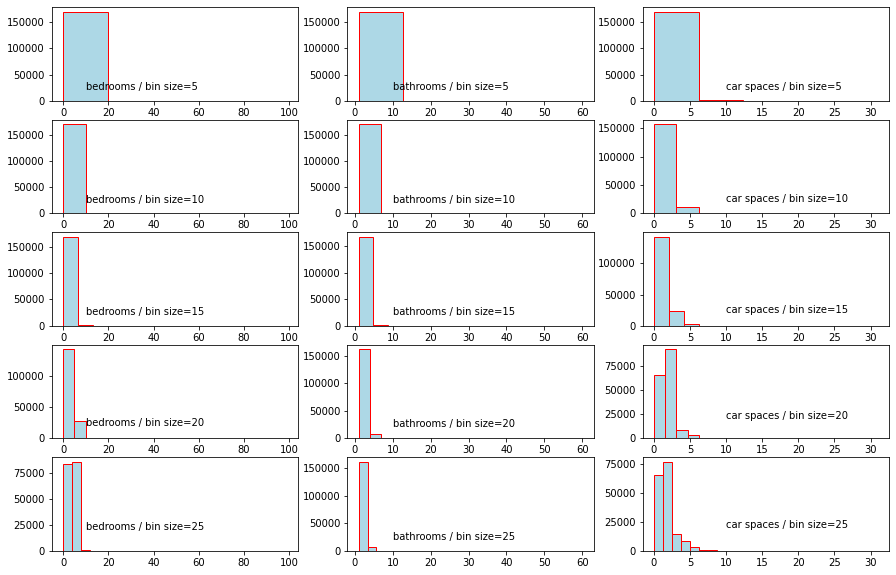

In [13]:
# Visualizing data with different bin size to explore distribution of data.
fig, ax = plt.subplots(5, 3, figsize=(15,10))
cat = ['bed','bath', 'car']
title = ['bedrooms', 'bathrooms', 'car spaces']

for j, c,t in zip(range(3),cat,title):
    for i,s in zip(range(5),range(5,31,5)):
        ax[i,j].hist(c,data=cdf, bins=s, edgecolor="red", color="lightblue")
        ax[i,j].text(10,20000,t + " / bin size=" + str(s) ,fontsize=10)     
        

**Findings**

Most data distributed in range (0,10) for number of bedrooms, (0,5) for number of bathrooms, and (0,10) for number of car spaces.

Those data points that are out of these ranges will be removed for analysis purpose.

In [14]:
print("\nNumber of data points: {0:,d}\nNumber of features: {1:10,d}".format(data.shape[0],data.shape[1]))


Number of data points: 199,504
Number of features:          9


In [15]:
# Removing outliers [bed] (drop any bed>10)
bef = len(cdf)
cdf.drop(cdf[cdf.bed >10].index, inplace=True)
aft = len(cdf)
print("Number of data points before: {0:,d}\nTotal data points removed: {2:,d}\nAfter removing [bed]: {1:,d}".format(bef, aft, bef-aft))

Number of data points before: 170,105
Total data points removed: 101
After removing [bed]: 170,004


In [16]:
# Removing outliers [bath] (drop any [bath]>5)
bef = len(cdf)
cdf.drop(cdf[cdf.bath >5].index, inplace=True)
aft = len(cdf)
print("Number of data points before: {0:,d}\nTotal data points removed: {2:,d}\nAfter removing [bath]: {1:,d}".format(bef, aft, bef-aft))

Number of data points before: 170,004
Total data points removed: 510
After removing [bath]: 169,494


In [17]:
# Removing outliers [car] (drop any [car]>10)
bef = len(cdf)
cdf.drop(cdf[cdf.car >10].index, inplace=True)
aft = len(cdf)
print("Number of data points before: {0:,d}\nTotal data points removed: {2:,d}\nAfter removing [car]: {1:,d}".format(bef, aft, bef-aft))

Number of data points before: 169,494
Total data points removed: 113
After removing [car]: 169,381


In [18]:
var = cdf[['bed','bath', 'car']]
for v in var:
    print('Number of sale transactions per unique value for [', v,']')
    print(cdf[v].value_counts().to_frame())

Number of sale transactions per unique value for [ bed ]
      bed
3   66916
4   58837
5   22082
2   15589
6    3864
1    1033
7     668
8     208
0      76
9      76
10     32
Number of sale transactions per unique value for [ bath ]
    bath
2  70907
1  62664
3  28658
4   5783
5   1369
Number of sale transactions per unique value for [ car ]
      car
2   77000
1   48892
0   16600
3   14811
4    8524
5    1627
6    1215
8     266
7     254
10    122
9      70


* #### Check outliers for [sellPrice]


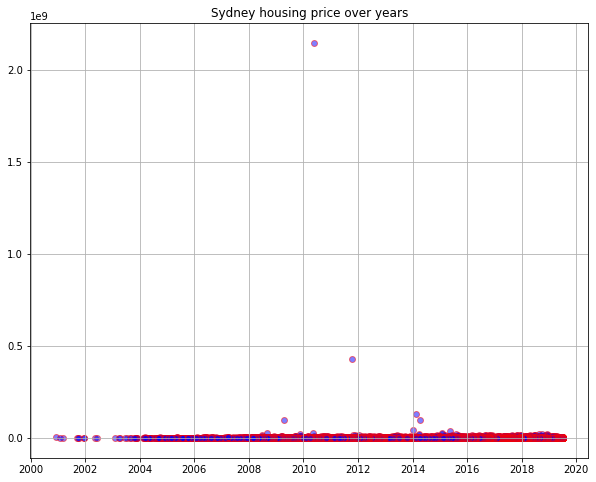

In [19]:
# Scatterplot to visualize house price over period

plt.scatter(cdf.date, cdf.sellPrice, marker='o', c='b',edgecolor='r', alpha=0.5)
plt.title("Sydney housing price over years")
plt.grid()
plt.show()

There are houses that are sold at prices extremely higher than others, these may affect the analysis results.
To decide how to handle the outliers [sellPrice], I will try diffent approaches
- Approach no#1 Calculate percentile to see data range and skewness:  create df named p_cdf 
- Approach no#2: removing data by using Interquantile technique: create df named IQR_cdf

####  Approach no#1: Calculate percentile, new data set p_cdf

In [20]:
# Calculate percentile of sell price to see data range, and spot outliers if any 
qr = [0.0001,0.0005,0.0009, 0.001, 0.25, 0.5, 0.75, 0.9, 0.999, 0.9999]
print("Percentiles of house price")
for q in qr:
    print("{0:5,.2f} percentile: {1:15,.0f}".format(q*100, cdf.sellPrice.quantile(q)))
l=0.0009
u=0.9999
lq = cdf.sellPrice.quantile(l)
uq = cdf.sellPrice.quantile(u)
print("\n\033[1mFindings\033[0m\n{0}% of Sydney houses price between ${1:,.0f} and ${2:,.0f}".format((u-l)*100, lq, uq))

Percentiles of house price
 0.01 percentile:             441
 0.05 percentile:          47,795
 0.09 percentile:         201,163
 0.10 percentile:         217,190
25.00 percentile:         751,000
50.00 percentile:       1,050,000
75.00 percentile:       1,550,000
90.00 percentile:       2,230,000
99.90 percentile:       9,500,000
99.99 percentile:      19,013,790

Findings
99.9% of Sydney houses price between $201,163 and $19,013,790


#####  Action: Now I am going to create a new dataset p_cdf that contains only data falls into this range ($201163 , $19013790)

In [21]:
# keeping only points between 0.09 - 99.99 percentitle
p_cdf = cdf.loc[(cdf.sellPrice>=lq) & (cdf.sellPrice<=uq),:]
p_cdf[['sellPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
sellPrice,"169,211","1,295,226","909,497","202,000","752,000","1,050,000","1,550,000","18,980,000"


In [22]:
# Calculate number of data points removed
bef = len(cdf)
aft = len(p_cdf)
print("Number of data points before: {0:,d}\nTotal data points removed: {2:,d} (or {3:,.2f}%)\nAfter removing [sellPrice] using percentile: {1:,d}"
      .format(bef, aft, bef-aft, (bef-aft)*100/bef))

Number of data points before: 169,381
Total data points removed: 170 (or 0.10%)
After removing [sellPrice] using percentile: 169,211


####  Approach no#2: Using IQR, new data set IQR_cdf
IQR technique will only keep data points in between Q1-1.5*IQR and Q3+1.5*IQR


In [23]:
# Define function to remove outliers
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

def return_final(df,col):
    df_outlier_removed=remove_outlier_IQR(col)
    ind_diff=df.index.difference(df_outlier_removed.index)

    for i in range(0, len(ind_diff),1):
        df_final=df.drop([ind_diff[i]])
        df=df_final
    return df

In [24]:
# create new df named IQR_cdf
IQR_cdf = cdf
# apply return_final function to remove outliers
IQR_cdf=return_final(IQR_cdf, IQR_cdf['sellPrice'])

In [25]:
IQR_cdf[['sellPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
sellPrice,"159,886","1,134,838","522,123",1,"740,000","1,000,000","1,435,000","2,747,000"


In [26]:
# Calculate number of data points removed
bef = len(cdf)
aft = len(IQR_cdf)
print("Number of data points before: {0:,d}\nTotal data points removed: {2:,d} (or {3:,.2f}%)\nAfter removing [sellPrice] using IQR: {1:,d}"
      .format(bef, aft, bef-aft, (bef-aft)*100/bef))
print("IQR removed {0:,d} data points, roughly {1:,.2f}% of total data.".format(bef-aft,(bef-aft)*100/bef))

Number of data points before: 169,381
Total data points removed: 9,495 (or 5.61%)
After removing [sellPrice] using IQR: 159,886
IQR removed 9,495 data points, roughly 5.61% of total data.


In [27]:
cdf[['sellPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
sellPrice,"169,381","1,313,007","5,419,645",1,"751,000","1,050,000","1,550,000","2,147,483,647"


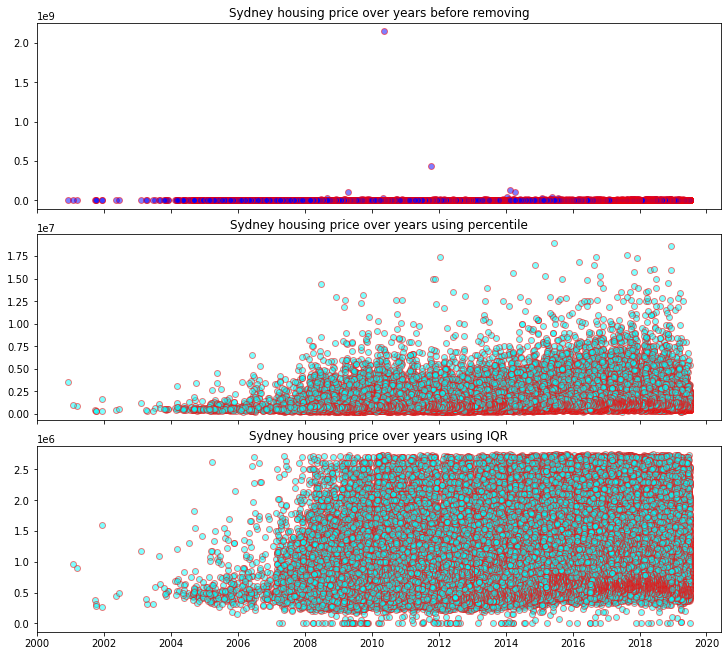

In [28]:
# Using scatterplot to visualize two approaches, compring how data distribute

fig, ax = plt.subplots(3, figsize=(10, 9), constrained_layout = True, sharex=True)

ax[0].scatter(cdf.date, cdf.sellPrice, marker='o', c='b',edgecolor='r', alpha=0.5)
ax[0].set_title("Sydney housing price over years before removing")

ax[1].scatter(p_cdf.date, p_cdf.sellPrice, marker='o', c='cyan',edgecolor='r', alpha=0.5)
ax[1].set_title("Sydney housing price over years using percentile")

ax[2].scatter(IQR_cdf.date, IQR_cdf.sellPrice, marker='o', c='cyan',edgecolor='r', alpha=0.5)
ax[2].set_title("Sydney housing price over years using IQR")

plt.show()

### Results
Based on the above comparision, I decided to remove outliers by percentile, which only removes 0.1% of data points, comparing to IQR, which drops 5.6% of data and still keeps those points with sell price of $1

Finally, data is cleaned, with 169,211 data points remaining. 
Next step, visualization and analysis.

In [29]:
# copy cleaned data to overwrite cdf
cdf = p_cdf
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"169,211","99,068","57,834",1,"48,658","98,161","149,108","199,504"
postalCode,"169,211","2,198",198,"2,000","2,077","2,142","2,210","2,777"
sellPrice,"169,211","1,295,226","909,497","202,000","752,000","1,050,000","1,550,000","18,980,000"
bed,"169,211",4,1,0,3,4,4,10
bath,"169,211",2,1,1,1,2,2,5
car,"169,211",2,1,0,1,2,2,10


<a id="5"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">5. ANALYSIS</p>

In this step, data will be aggregated to explore sell price and number of sale transactions on yearly or monthly basis. 
Also, to find out how the housing price relate to location, as well as house's conditions.
To answer following questions:
1. The most expensive locations by suburb and by postal code
2. The busiest month/year for housing market


In [30]:
# Create new features [year], [month] from [date]
cdf['year'] = pd.DatetimeIndex(cdf['date']).year
cdf['month'] = pd.DatetimeIndex(cdf['date']).month
cdf['month_name'] = cdf['date'].dt.month_name().str[:3]

In [31]:
# SUBURB: median sell price and number of sale transactions group by suburb, order by median price desc.
sb_df = cdf.groupby('suburb').agg({'sellPrice':'median', 'id':'count'}).reset_index().sort_values(by='sellPrice', ascending=False)
sb_df.columns = ['suburb','medianPrice','transactions']
sb_df

,suburb,medianPrice,transactions
499,Point Piper,"6,450,000",33
155,Collaroy Beach,"4,900,000",3
183,Darling Point,"4,800,000",57
659,Woolwich,"4,000,000",11
50,Bellevue Hill,"3,750,000",537
...,...,...,...
205,Eagle Vale,"460,500",540
652,Wolli Creek,"460,000",4
71,Blairmount,"455,000",45
590,Tahmoor,"449,000",805


In [32]:
# Top 10 suburbs with highest median housing price
sb_t10 = sb_df[:10]
sb_t10['color'] = light_color
sb_t10['color'][3:] = deep_color
sb_t10

,suburb,medianPrice,transactions,color
499,Point Piper,"6,450,000",33,#496595
155,Collaroy Beach,"4,900,000",3,#496595
183,Darling Point,"4,800,000",57,#496595
659,Woolwich,"4,000,000",11,#c6ccd8
50,Bellevue Hill,"3,750,000",537,#c6ccd8
337,Kurraba Point,"3,525,000",4,#c6ccd8
172,Cremorne Point,"3,510,000",53,#c6ccd8
609,Vaucluse,"3,505,000",683,#c6ccd8
132,Centennial Park,"3,300,000",25,#c6ccd8
591,Tamarama,"3,250,000",89,#c6ccd8


In [33]:
# Top 10 suburbs with lowest median price

sb_b10 = cdf.groupby('suburb').agg({'sellPrice':'median', 'id':'count'}).reset_index().sort_values(by='sellPrice', ascending=True)[:10]
sb_b10.columns = ['suburb','medianPrice','transactions']
sb_b10['color'] = light_color
sb_b10['color'][3:] = deep_color
sb_b10

,suburb,medianPrice,transactions,color
664,Yanderra,"405,000",85,#496595
590,Tahmoor,"449,000",805,#496595
71,Blairmount,"455,000",45,#496595
652,Wolli Creek,"460,000",4,#c6ccd8
205,Eagle Vale,"460,500",540,#c6ccd8
34,Bar Point,"465,000",16,#c6ccd8
234,Eschol Park,"466,000",361,#c6ccd8
373,Macquarie Fields,"470,000",835,#c6ccd8
644,Willmot,"470,000",61,#c6ccd8
98,Buxton,"475,000",254,#c6ccd8


In [34]:
# POSTAL CODE: median sell price and number of sale transactions group by postal code, order by median price desc.
pc_df = cdf.groupby('postalCode').agg({'sellPrice':'median', 'id':'count'}).reset_index().sort_values(by='sellPrice', ascending=False)
pc_df.columns = ['postalCode','medianPrice', 'transactions']
pc_df

,postalCode,medianPrice,transactions
14,2023,"3,750,000",537
21,2030,"3,200,000",1130
18,2027,"3,000,000",172
19,2028,"2,920,000",191
69,2088,"2,801,000",1040
...,...,...,...
212,2574,"510,000",742
199,2559,"495,000",55
198,2558,"478,000",1177
202,2564,"472,000",847


In [35]:
# Top 10 postal code with highest median housing price
pc_t10 = pc_df[:10]
pc_t10['color'] = light_color
pc_t10['color'][3:] = deep_color
pc_t10

,postalCode,medianPrice,transactions,color
14,2023,"3,750,000",537,#496595
21,2030,"3,200,000",1130,#496595
18,2027,"3,000,000",172,#496595
19,2028,"2,920,000",191,#c6ccd8
69,2088,"2,801,000",1040,#c6ccd8
43,2061,"2,600,000",73,#c6ccd8
20,2029,"2,490,000",450,#c6ccd8
0,2000,"2,300,000",149,#c6ccd8
87,2108,"2,280,000",319,#c6ccd8
45,2063,"2,277,500",692,#c6ccd8


### 1. The most expensive locations to live in Sydney 

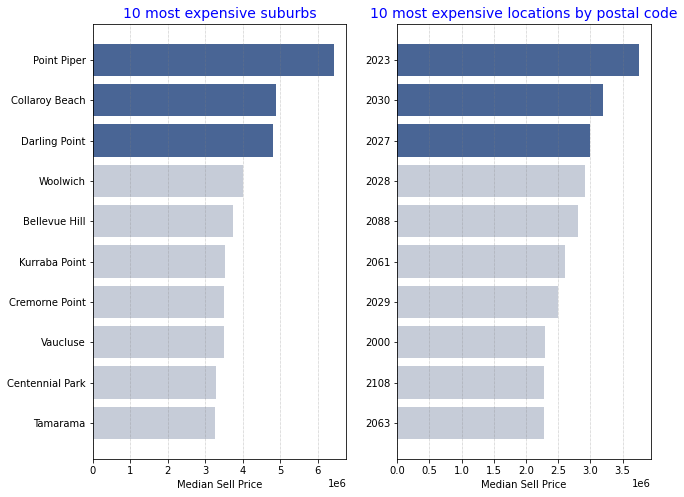

In [36]:
# Top 10 suburbs
ax1=plt.subplot(1,2,1)
y_pos = np.arange(len(sb_t10['suburb'])) # y label locations
ax1.barh(y_pos, sb_t10['medianPrice'],align='center',color=sb_t10['color'])
ax1.set_yticks(y_pos)
ax1.set_yticklabels(sb_t10['suburb'])
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Median Sell Price')
ax1.set_title("10 most expensive suburbs", fontdict={'fontsize':14, 'color':'b'})
ax1.grid(axis='x', color='grey', linestyle=':', linewidth=0.5)

# Top 10 postal codes
ax2= plt.subplot(1,2,2)
y_pos = np.arange(len(pc_t10['postalCode'])) # y label locations
ax2.barh(y_pos, pc_t10['medianPrice'],align='center', color=pc_t10['color'])
ax2.set_yticks(y_pos)
ax2.set_yticklabels(pc_t10['postalCode'])
ax2.invert_yaxis()  
ax2.set_xlabel('Median Sell Price')
ax2.set_title("10 most expensive locations by postal code", fontdict={'fontsize':14, 'color':'b'} )
ax2.grid(axis='x', color='grey', linestyle=':', linewidth=0.5)

plt.show()

### 2. The busiest month / year for housing market in Sydney 

In [37]:
# Grouping data on monthly basis, order by count(id) or number of transactions

month_df = cdf.groupby(['month','month_name']).agg({'id':'count','sellPrice':'median'}).reset_index().sort_values(by='id', ascending=False)
month_df.columns = ['month','month_name','transactions','medianPrice']
month_df

,month,month_name,transactions,medianPrice
2,3,Mar,18089,"1,100,000"
10,11,Nov,17694,"1,100,000"
4,5,May,16641,"1,050,000"
9,10,Oct,15548,"1,080,000"
8,9,Sep,15144,"1,108,500"
5,6,Jun,14587,"1,050,000"
3,4,Apr,14123,"1,050,000"
7,8,Aug,13683,"1,050,000"
1,2,Feb,13093,"1,060,000"
11,12,Dec,12774,"1,005,000"


In [38]:
# Grouping data on monthly basis, no sorting
month2_df = cdf.groupby(['month','month_name']).agg({'id':'count','sellPrice':'median'}).reset_index()
month2_df.columns = ['month','month_name','transactions','medianPrice']
month2_df

,month,month_name,transactions,medianPrice
0,1,Jan,5531,"860,000"
1,2,Feb,13093,"1,060,000"
2,3,Mar,18089,"1,100,000"
3,4,Apr,14123,"1,050,000"
4,5,May,16641,"1,050,000"
5,6,Jun,14587,"1,050,000"
6,7,Jul,12304,"980,000"
7,8,Aug,13683,"1,050,000"
8,9,Sep,15144,"1,108,500"
9,10,Oct,15548,"1,080,000"


In [39]:
# Grouping data on yearly basis, order by transactions desc
year_df = cdf.groupby('year').agg({'id':'count','sellPrice':'median'}).reset_index().sort_values(by='id', ascending=False)
year_df.columns = ['year', 'transactions','medianPrice']
year_df.head()

,year,transactions,medianPrice
17,2017,23685,"1,250,000"
16,2016,22296,"1,200,000"
15,2015,22290,"1,250,000"
18,2018,20184,"1,132,000"
14,2014,19409,"1,075,000"


In [40]:
# Grouping data on yearly basis, no sorting
year2_df = cdf.groupby('year').agg({'id':'count','sellPrice':'median'}).reset_index()
year2_df.columns = ['year', 'transactions', 'medianPrice']
year2_df

,year,transactions,medianPrice
0,2000,1,"3,565,000"
1,2001,7,"372,000"
2,2002,2,"463,750"
3,2003,13,"530,000"
4,2004,59,"510,000"
5,2005,130,"520,000"
6,2006,166,"602,500"
7,2007,712,"750,125"
8,2008,3317,"802,000"
9,2009,6941,"802,500"


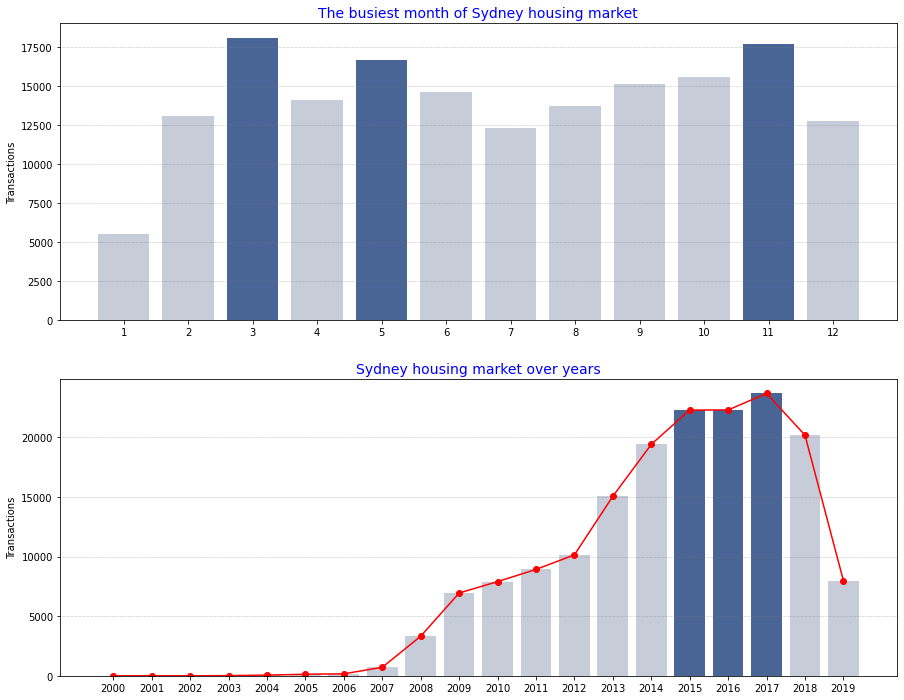

In [41]:
# Visualizing number of houses sold per month and per year
plt.figure(figsize=(15, 12))
# monthly volume
month_list = range(math.floor(month_df['month'].min()), math.ceil(month_df['month'].max())+1) #show xticklabel as int
month_df['color'] = light_color
month_df['color'][3:] = deep_color
ax1 = plt.subplot(2,1,1)
ax1.bar('month', 'transactions', data=month_df, color=month_df['color'])
ax1.set_ylabel('Transactions')
ax1.set_xticks(month_list)
ax1.set_title("The busiest month of Sydney housing market", fontdict={'fontsize':14, 'color':'b'})
ax1.grid(axis='y', color='grey', linestyle=':', linewidth=0.5)

# Yearly volume
year_list = range(math.floor(year_df['year'].min()), math.ceil(year_df['year'].max())+1) #show xticklabel as int
year_df['color'] = light_color
year_df['color'][3:] = deep_color

ax2=plt.subplot(2,1,2)
ax2.bar('year', 'transactions', data=year_df, color=year_df['color']) #bar chart
ax2.plot(year2_df['year'], year2_df['transactions'], color='r', marker='o')
ax2.set_xticks(year_list)
ax2.set_ylabel('Transactions')
ax2.set_title("Sydney housing market over years", fontdict={'fontsize':14, 'color':'b'})
ax2.grid(axis='y', color='grey', linestyle=':', linewidth=0.5)
plt.show()

### **Findings**
Sydney's housing market appeared to be busiest in March, November, May and be slowest in January.

From 2000 to 2019, Sydney housing market reached its peak , 23,865 houses being sold. Market has been very active between 2015 and 2017, more than 22,000 transactions each year. 
Then 2019, Australian property market crashed, experienced a sharp fall.

In [42]:
### Merge two data sets 
# Merge with suburb data set to plot on map
merge_df = pd.merge(sb_df, suburb, how='inner', left_on='suburb', right_on='Suburb')
merge_df.drop(columns='Suburb', inplace=True)
merge_df

,suburb,medianPrice,transactions,Latitude,Longitude
0,Point Piper,"6,450,000",33,-34,151
1,Darling Point,"4,800,000",57,-34,151
2,Woolwich,"4,000,000",11,-34,151
3,Bellevue Hill,"3,750,000",537,-34,151
4,Kurraba Point,"3,525,000",4,-34,151
...,...,...,...,...,...
603,Willmot,"470,000",61,-34,151
604,Eschol Park,"466,000",361,-34,151
605,Eagle Vale,"460,500",540,-34,151
606,Wolli Creek,"460,000",4,-34,151


<a id="6"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">6. VISUALIZATION</p>

In [43]:
# Dashboard
fig = make_subplots(rows=5, cols=2, vertical_spacing=0.07,
                    specs=[[{'type':'bar'}, {'type':'bar'}], 
                           [{'type':'bar', 'colspan':2}, None],
                           [{'type':'bar', 'colspan':2}, None],
                           [{'type':'Scattergeo', 'rowspan':2,'colspan':2}, None], 
                           [None,None]],                
                    subplot_titles=("10 most expensive suburbs", "10 most affordable suburbs",
                                   "Sydney housing market over years", 
                                   "Busiest month of the year",
                                   "Mapping Sydney suburbs"))

fig.add_trace(go.Bar(y=sb_t10['suburb'], x=sb_t10['medianPrice'], #Top 10 suburbs
                     marker=dict(color= sb_t10['color']), 
                     hovertemplate="Suburb: %{y}<br>Median price: %{x}<extra></extra>",
                     name='suburb', orientation='h'),
              row=1,col=1)
fig.add_trace(go.Bar(y=sb_b10['suburb'], x=sb_b10['medianPrice'], # Bottom 10 suburbs
                     marker=dict(color= sb_b10['color']), 
                     hovertemplate="Suburb: %{y}<br>Median price: %{x}<extra></extra>",
                     name='suburb', orientation='h'),
              row=1,col=2)
   
fig.add_trace(go.Scatter(x=year2_df['year'], y=year2_df['transactions'],  # Yearly volume transaction
                         mode='markers+lines', marker=dict(color= 'green'), 
                         hovertemplate="Year: %{x}<br>Number of transactions: %{y}",
                         name='yearly volume'),
              row=2,col=1)
fig.add_trace(go.Bar(x=year_df['year'], y=year_df['transactions'],  # Yearly volume transaction
                     marker=dict(color= year_df['color']), name='yearly volume',
                     hovertemplate="Year: %{x}<br>Number of transactions: %{y}"),
              row=2,col=1)

fig.add_trace(go.Bar(x=month_df['month'], y=month_df['transactions'], # Monthly volume
                     marker=dict(color= month_df['color']),name='monthly volume'), 
              row=3,col=1)

fig.add_trace(go.Scattergeo( lat=merge_df['Latitude'], lon=merge_df['Longitude'],
                            customdata=merge_df['transactions'],
                            hoverinfo='text', hovertext=merge_df['suburb'],
                            hovertemplate="Suburb: %{hovertext}<br>Median price: %{text}<br>Number of transactions: %{customdata}",
                            mode="markers", name='suburb', text=merge_df['medianPrice'],
                            textfont={"color": ["grey"], "family": ["Arial"],"size": [12]},
                            textposition=["top center"],
                            marker={'size':8, 'color': 'blue', 'opacity':0.7,'line':dict(width=1, color='grey')}),
              row=4, col=1)

fig.update_geos(resolution=110, visible=False,  # update map 
                showcountries=True, countrycolor="Black",
                showsubunits=True, showocean=True, 
                subunitcolor="Cyan",showland = True, fitbounds="locations")
fig.update_layout(height=1200, width=1000, 
                  showlegend=False, 
                  title = 'Housing market in Sydney 2000-2019', 
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif")
                 )
fig.update_yaxes( ticksuffix=' ', categoryorder='total ascending', row=1) # show suburbs by median price order
fig.update_xaxes(tickmode = 'array',tickvals=month_df['month'], ticktext=[i for i in month_df['month_name']], visible=True, row=3, col=1)

<a id="7"></a>
# <p style="background-color:#154c79;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">7. CONCLUSION</p>
In summary, housing market in Sydney was peak from 2015 to 2017 with more than 23,000 transactions,and then experienced a sharp decline in 2018 and 2019. Market seems crowded in March, May and November. In other words, buyers may find it affordable to buy their dream house in the market in these months as supply is quite higher than other months, of course facing more intense price competition.
The price gap between suburbs is very large, Yanderra with lowest median price of 405k, while Point Piper's median price is 6.45M

Because of the limitation of data (only 200k records), which is not fully represented Sydney housing market, this project is  for purpose of practising only.

Welcome any feedback or question. Thank you!